# Welcome to "Clustering (Customer Segmentation) Project".

In this project, customers will be segmented based on their purchase history obtained from membership cards of a large shopping mall.

# Tasks

## 1. Import Libraries, Load Dataset, Exploring Data
--> Import Libraries  
--> Load Dataset  
--> Explore Data  

## 2. Exploratory Data Analysis (EDA)

## 3. Cluster Analysis

--> Clustering based on Age and Spending Score  
--> Clustering based on Annual Income and Spending Score  
--> Hierarchical Clustering  
--> Conclusion  

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Explore Data

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()
# Outlier values impair clustering quality.
# If there are outlier values in our data, we cannot ignore them in clustering algorithms.
# scalling !

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.rename(columns={'Annual Income (k$)':"annual_income",'Spending Score (1-100)':'spending_score'},inplace=True)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'annual_income', 'spending_score'], dtype='object')

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

## 2. Exploratory Data Analysis (EDA)

In [12]:
df.head()  

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Relation between Annual Income and Spending Score

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

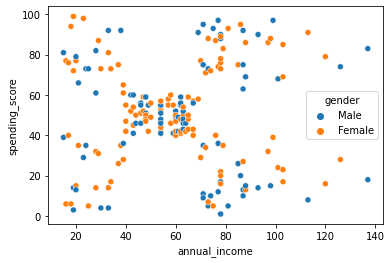

In [13]:
sns.scatterplot(data = df, x = "annual_income", y = "spending_score", hue = "gender")

### Relation between Age and Spending Score

<AxesSubplot:xlabel='age', ylabel='spending_score'>

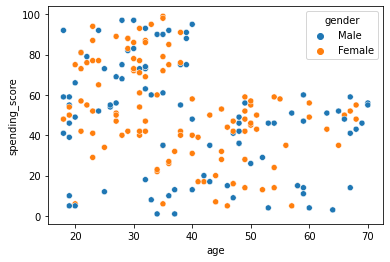

In [14]:
sns.scatterplot(data = df, x = "age", y = "spending_score", hue = "gender")

### Relation between Age and Annual_income

<AxesSubplot:xlabel='age', ylabel='annual_income'>

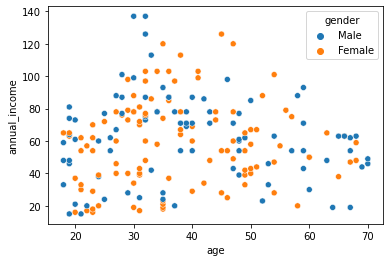

In [15]:
sns.scatterplot(data = df, x = "age", y = "annual_income", hue = "gender")

<AxesSubplot:>

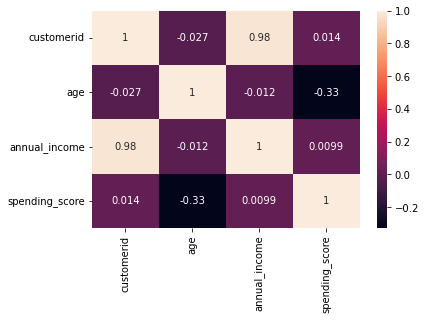

In [16]:
sns.heatmap(df.corr(),annot=True)  # no high corr between features

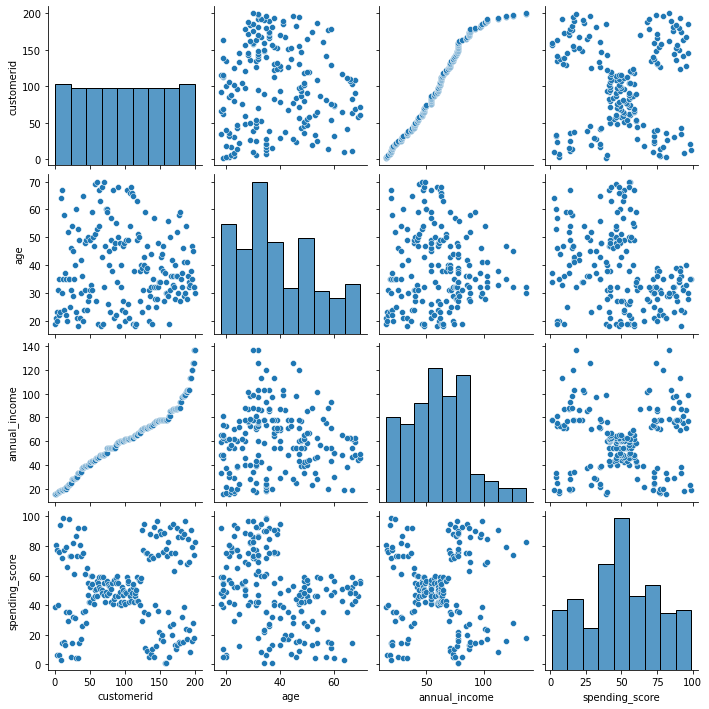

In [17]:
sns.pairplot(df);  

# Does our data tend to cluster or not, how many clusters can I divide it into? We can get an idea by looking at the scatterplot.

In [18]:
# I saw that the annual income and spending score features are prone to clustering.

## 3. Cluster Analysis

The main purpose of this project is to perform cluster analysis with the K-Means and Hierarchical Clustering algorithms.

### Clustering based on Age and Spending Score

* I will create a new dataset with two variables

In [19]:
df1 = df[['age',"spending_score"]]  

In [20]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [21]:
hopkins(df1,df1.shape[0])  # hopkins score should be under 0.5. Each time the score will change, cause random point will change eac time.

0.3143308764796462

### Determine optimal number of clusters

In [22]:
from sklearn.cluster import KMeans

In [23]:
ssd = []

K = range(2,10)  # Let's be careful that we start range from 2, if we start from 1, we always see 2 as optimal k from elbow.

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df1)
    ssd.append(model.inertia_)
# inertia calculates how often observations in clusters surround their centroids
# The smaller inertia better the clusters surrounded their centroids

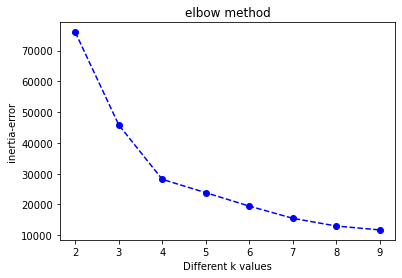

In [24]:
plt.plot(K, ssd, "bo--")  
plt.xlabel("Different k values")
plt.ylabel("inertia-error")     # sum of square distance between point to centroits (SSD)
plt.title("elbow method");

In [25]:
ssd # sum of squared distance

[75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23838.248821646186,
 19483.1179104427,
 15514.193134351031,
 13006.48362885102,
 11738.020296954506]

In [26]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332


<AxesSubplot:>

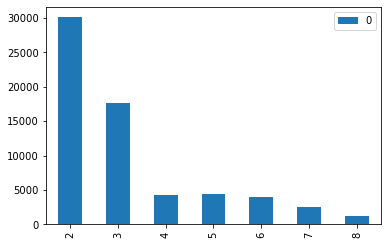

In [27]:
df_diff[1:].plot(kind='bar')

In [28]:
# In the elbow method and in the df_diff I saw that the optimal number of cluster is 4 

### Distortion

In [29]:
# The lower the distortion value, the tighter the clusters are clustered around the centroid.   

K=range(2,11)
distortion=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k,
                        random_state=42)
    kmeanModel.fit(df1)

    distances = kmeanModel.transform(df1)    
    labels_ = kmeanModel.labels_            

    result = []
    for i in range(k):
        cluster_distances = distances[labels_ == i, i] 
        result.append(np.mean(cluster_distances**2))
                                                    
    distortion.append(sum(result))

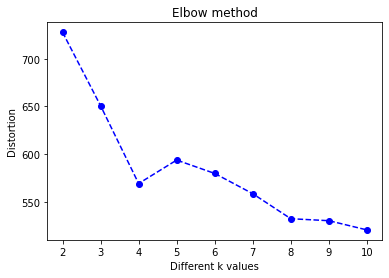

In [30]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("Distortion") 
plt.title("Elbow method");
# I should try to choose the distortion score small

* I will also get a recommendation for optimal k by doing silhouette analysis.

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
     
# Here, I will try to get insight with the least number of features that can make clustering best.
# I should choose a value where inertia and distortion are low and silhouette score is high. 

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


In [33]:
# Inertia scores should not be too high, even if the silhouette score is high.

### Apply K Means

### n_cluster: 3 için

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df1)
cluster_labels = kmeans.labels_   

In [35]:
cluster_labels  

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [36]:
df1["cluster_k3"] = cluster_labels
df1

,age,spending_score,cluster_k3
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


Text(0.5, 1.0, 'No Group')

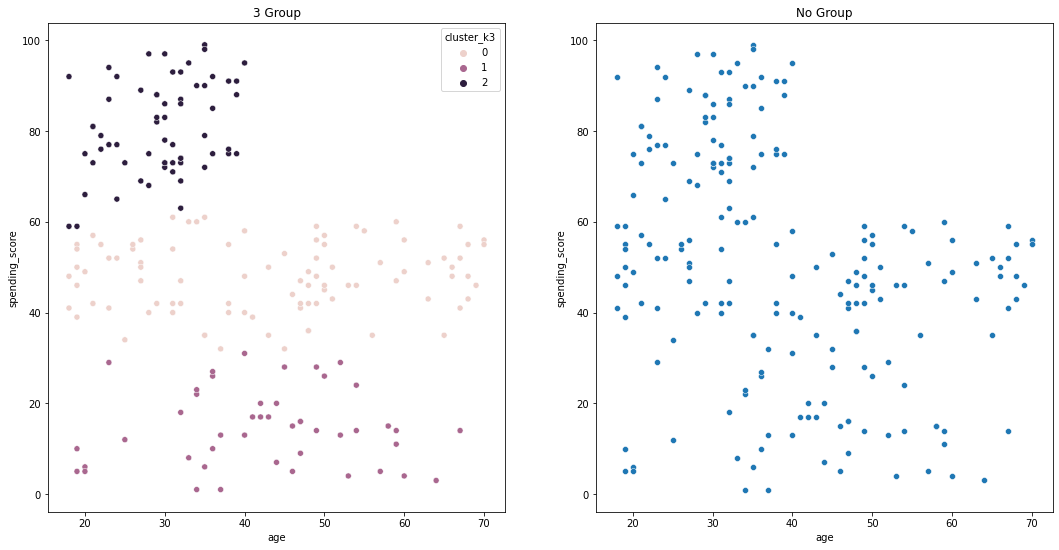

In [38]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster_k3')
plt.title("3 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")

### n_cluster:4

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df1)
cluster_labels = kmeans.labels_

In [40]:
df1['cluster_k4'] = cluster_labels

Text(0.5, 1.0, 'No Group')

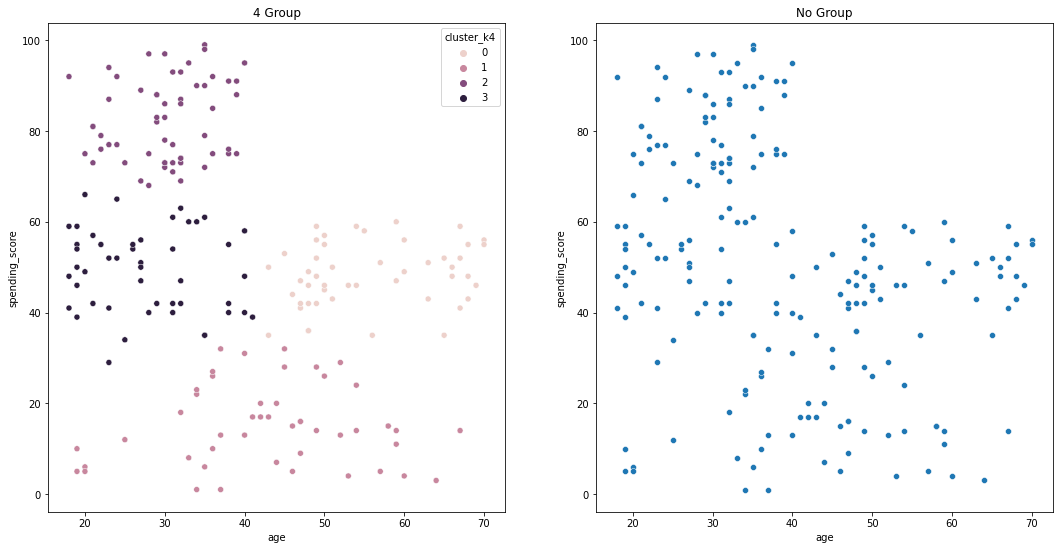

In [41]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster_k4')
plt.title("4 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")

In [ ]:
# k=4 is ideal

### n_cluster:5

Text(0.5, 1.0, 'No Group')

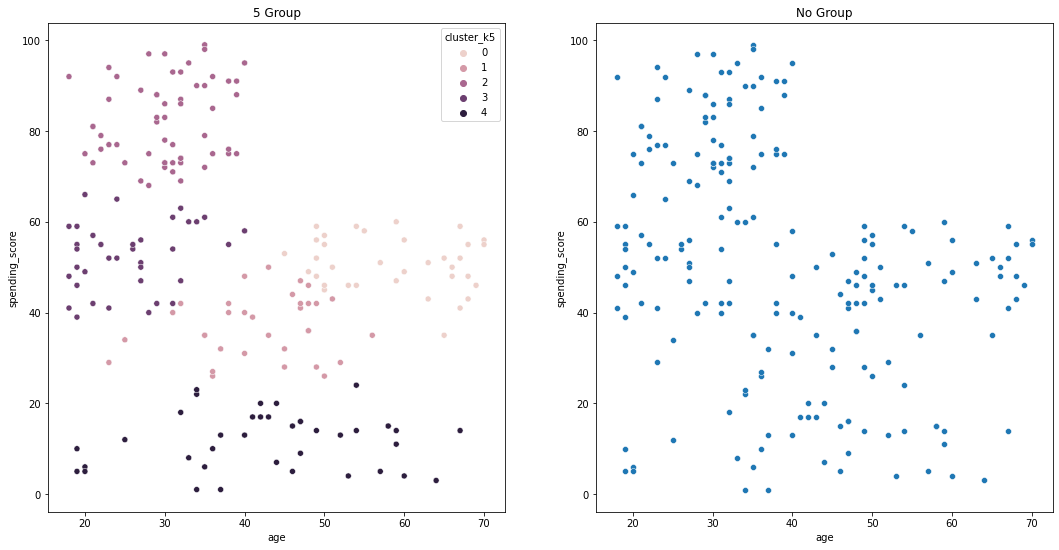

In [42]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df1)
cluster_labels = kmeans.labels_

df1['cluster_k5'] = cluster_labels

plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster_k5')
plt.title("5 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")

## Visualizing and Labeling All the Clusters

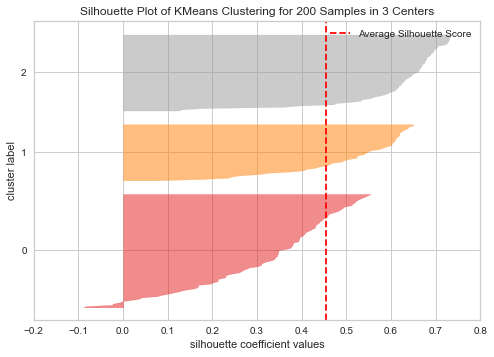

In [43]:
# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

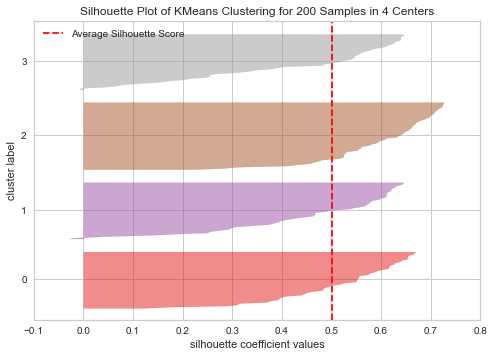

In [44]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

<AxesSubplot:xlabel='cluster_k4', ylabel='spending_score'>

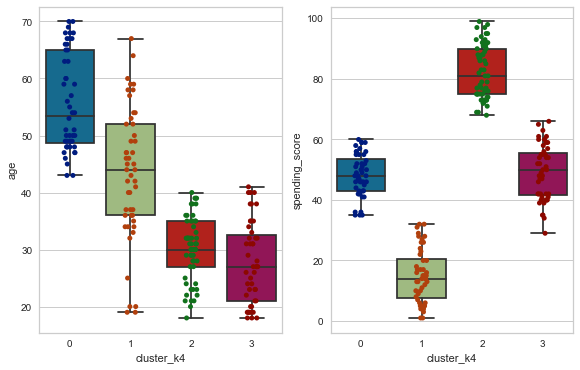

In [48]:
plt.figure(figsize = (20,6))
plt.subplot(141)
sns.boxplot(y = "age", x = "cluster_k4", data = df1)
sns.stripplot(y = "age", x = "cluster_k4", data = df1, palette="dark")
# With striplot, we can see where our clusters are dense and sparse.
plt.subplot(142)
sns.boxplot(y = "spending_score", x = "cluster_k4", data = df1)
sns.stripplot(y ="spending_score", x = "cluster_k4", data = df1, palette="dark")

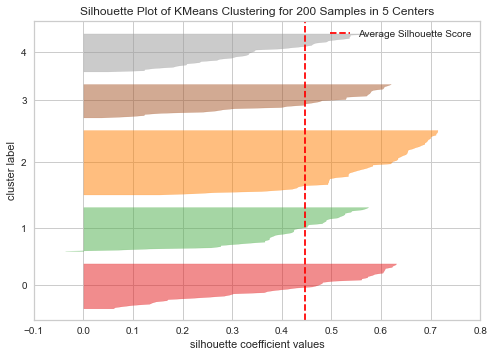

In [45]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

<AxesSubplot:xlabel='cluster_k5', ylabel='spending_score'>

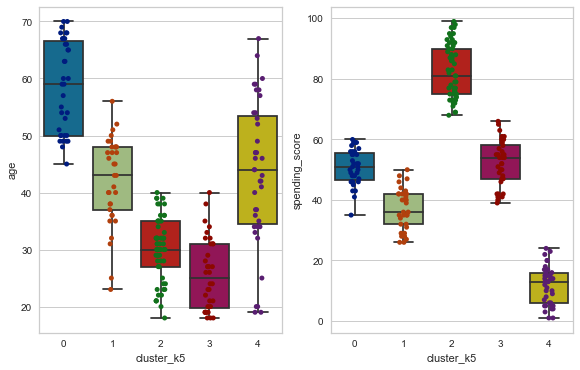

In [49]:
plt.figure(figsize = (20,6))
plt.subplot(141)
sns.boxplot(y = "age", x = "cluster_k5", data = df1)
sns.stripplot(y = "age", x = "cluster_k5", data = df1, palette="dark")
# With striplot, we can see where our clusters are dense and sparse.
plt.subplot(142)
sns.boxplot(y = "spending_score", x = "cluster_k5", data = df1)
sns.stripplot(y ="spending_score", x = "cluster_k5", data = df1, palette="dark")

### Clustering based on Annual Income and Spending Score

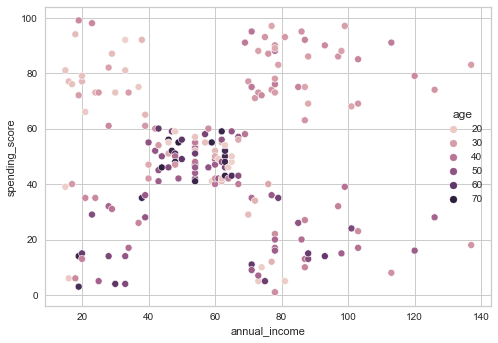

In [50]:
sns.scatterplot(data = df, x = "annual_income", y = "spending_score", hue = "age");

* I create a new dataset with two variables

In [51]:
df2 = df[['annual_income','spending_score']]

* I will determine optimal number of clusters

In [52]:
hopkins(df2,df2.shape[0])

0.3134508049063922

*  Apply K Means

In [53]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

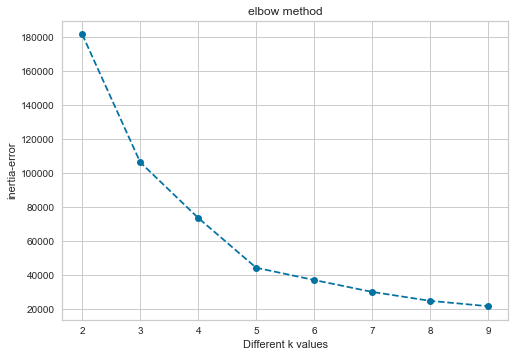

In [54]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

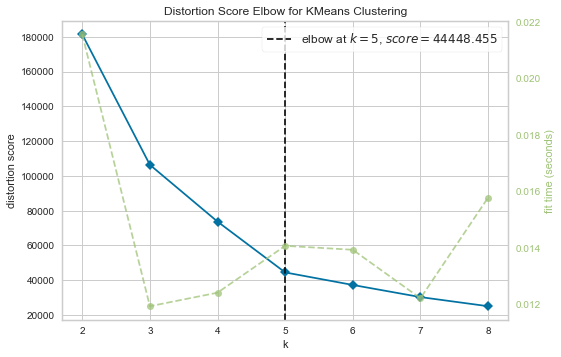

In [64]:
# from yellowbrick.cluster import KElbowVisualizer

# model_ = KMeans(random_state=42)
# visualizer = KElbowVisualizer(model_, k=(2,9))

# visualizer.fit(df2)        # Fit the data to the visualizer
# visualizer.show();

In [55]:
# The elbow method suggested k=5 to me, I see that the best silhouette score for n_clusters = 5

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


In [56]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df2)
cluster_labels = kmeans.labels_

In [57]:
df2['cluster_k5'] = cluster_labels
df2

,annual_income,spending_score,cluster_k5
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


Text(0.5, 1.0, 'No Group')

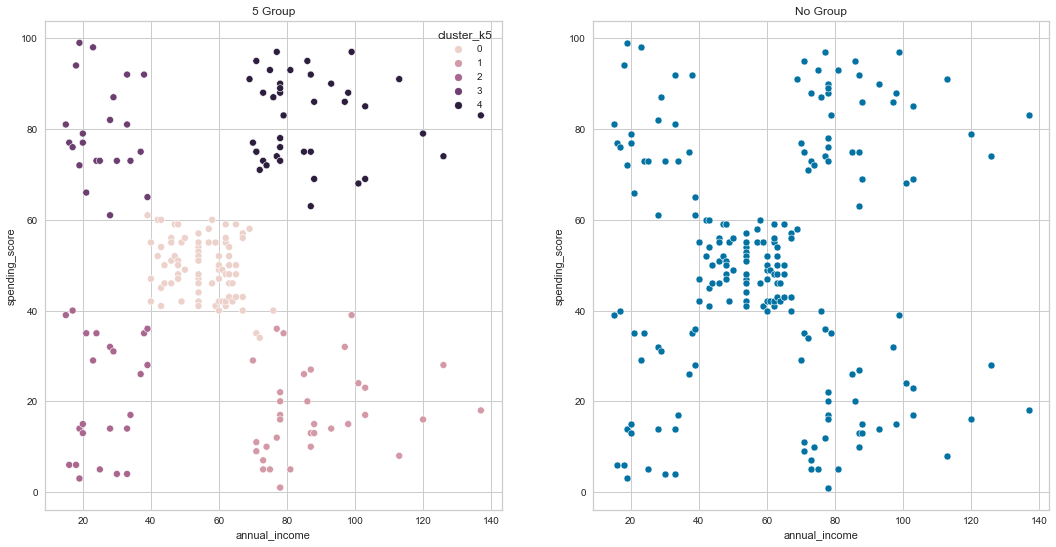

In [58]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df2, x = "annual_income",y = "spending_score", hue = 'cluster_k5')
plt.title("5 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "annual_income",y = "spending_score")
plt.title("No Group")

### Visualizing and Labeling All the Clusters

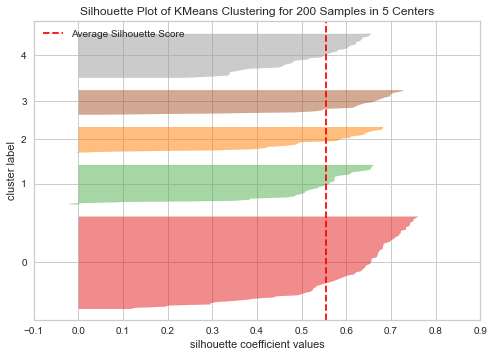

In [59]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(df2)       # Fit the data to the visualizer
visualizer.poof();

## Hierarchical Clustering

* Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

### Determine optimal number of clusters using Dendogram

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

* Clustering based on Age and Spending Score

In [62]:
hc_ward = linkage(y = df1, method = "ward")

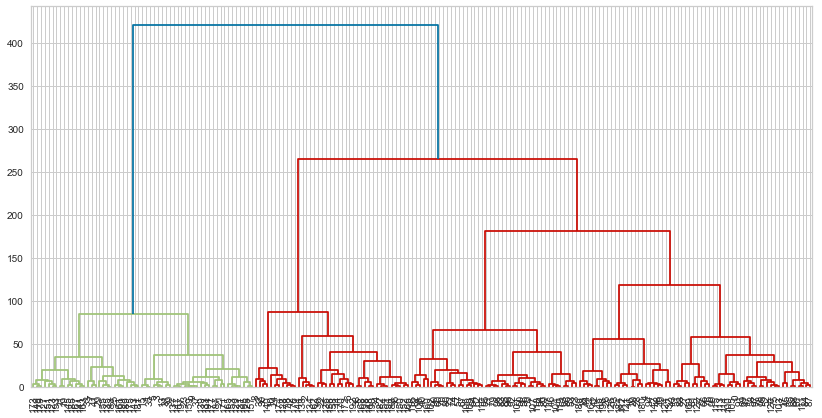

In [63]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

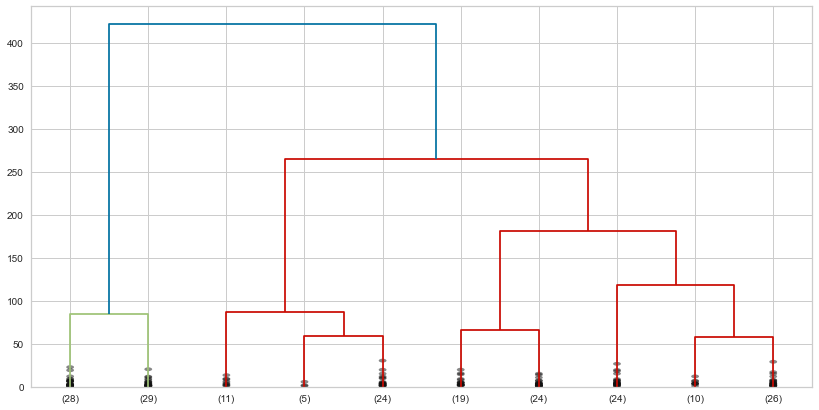

In [64]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

* Clustering based on Annual Income and Spending Score

In [65]:
hc_ward2 = linkage(y = df2, method = "ward")

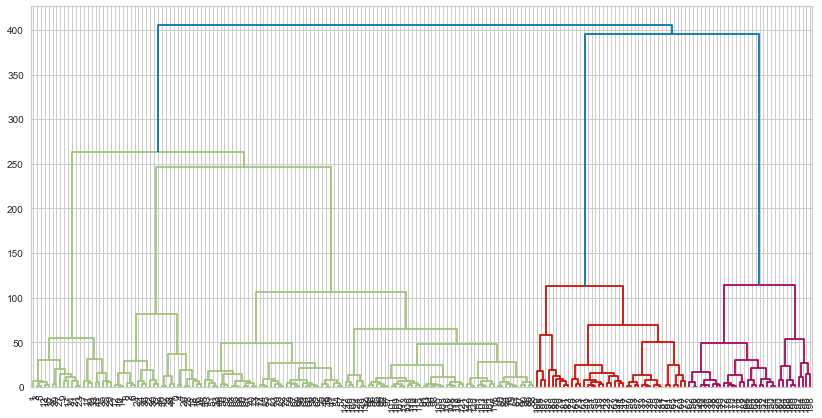

In [66]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward2, leaf_font_size = 10);

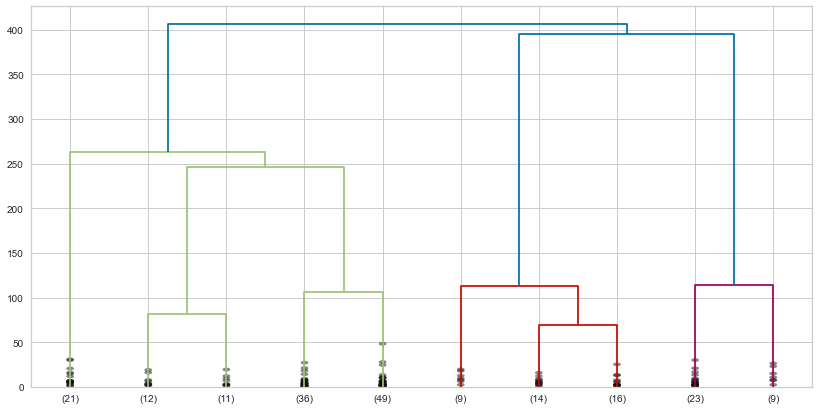

In [67]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward2,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

### Apply Agglomerative Clustering

In [68]:
from sklearn.cluster import AgglomerativeClustering  # from observation to cluster starting at the bottom

* Age and Spending Score

In [70]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}') # The highest silhouette score for 4 clusters

Silhouette Score for 2 clusters: 0.4553479994603083
Silhouette Score for 3 clusters: 0.44197137578531354
Silhouette Score for 4 clusters: 0.4706021586802142
Silhouette Score for 5 clusters: 0.42088087562864646
Silhouette Score for 6 clusters: 0.42284099257746877
Silhouette Score for 7 clusters: 0.39046175306548464
Silhouette Score for 8 clusters: 0.3748032259261892
Silhouette Score for 9 clusters: 0.3811181246043273


In [71]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")  
clusters = model.fit_predict(df1)

In [72]:
df1["predicted_clusters"] = clusters  # I add the predicted clusters as a column to df

In [73]:
df1.groupby("predicted_clusters").mean()

,age,spending_score,cluster_k3,cluster_k4,cluster_k5
predicted_clusters,,,,,
0,31.616667,45.833333,0.283333,2.483333,2.233333
1,30.175439,82.350877,2.000000,2.000000,2.000000
2,42.650000,12.275000,1.000000,1.000000,3.850000
3,56.906977,48.953488,0.000000,0.000000,0.209302


In [74]:
df1.predicted_clusters.value_counts()

0    60
1    57
3    43
2    40
Name: predicted_clusters, dtype: int64

* Annual Income and Spending Score

In [75]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model.labels_)}')  # # The highest silhouette score for 5 clusters

Silhouette Score for 2 clusters: 0.36737734620684265
Silhouette Score for 3 clusters: 0.462308734038414
Silhouette Score for 4 clusters: 0.4924899099064366
Silhouette Score for 5 clusters: 0.5541332798644271
Silhouette Score for 6 clusters: 0.5390996397382017
Silhouette Score for 7 clusters: 0.520894822141792
Silhouette Score for 8 clusters: 0.43313054817610713
Silhouette Score for 9 clusters: 0.43944465774630276


In [76]:
model = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df2)

In [77]:
df2["predicted_clusters"] = clusters  # I add the predicted clusters as a column to df

In [78]:
df2.groupby("predicted_clusters").mean()

,annual_income,spending_score,cluster_k5
predicted_clusters,,,
0,89.406250,15.593750,1.000000
1,55.811765,49.129412,0.070588
2,86.538462,82.128205,4.000000
3,25.095238,80.047619,3.000000
4,26.304348,20.913043,2.000000


In [79]:
df2.predicted_clusters.value_counts()

1    85
2    39
0    32
4    23
3    21
Name: predicted_clusters, dtype: int64

### Visualizing and Labeling All the Clusters

<AxesSubplot:ylabel='predicted_clusters'>

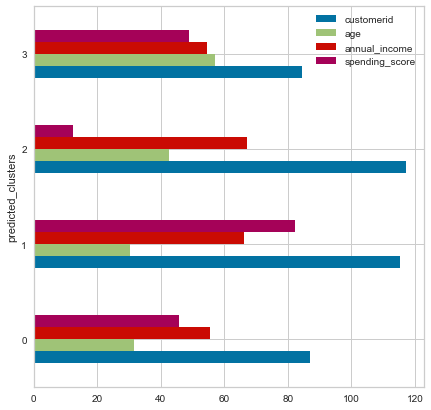

In [87]:
pd.concat([df, df1["predicted_clusters"]], axis=1).drop(columns=["gender"]).groupby(["predicted_clusters"]).mean().plot(kind="barh", figsize=(7,7))

### Conclusion

cluster 3 : The average age is around 55, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

cluster 2: The average age is around 45, the annula_income is high but the spending_scores are very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

cluster 1 :The average age is around 30. The annula_income is high and spending_scores are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

cluster 0 : The average age is around 25.both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

<AxesSubplot:ylabel='gender,predicted_clusters'>

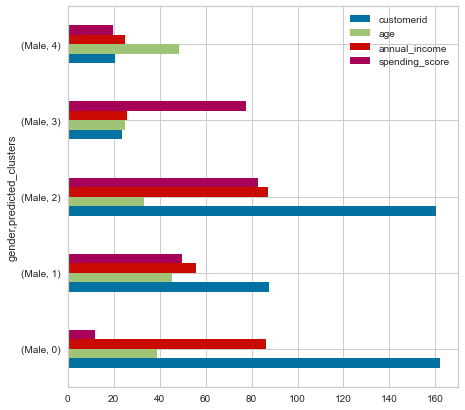

In [88]:
pd.concat([df, df2["predicted_clusters"]], axis=1).groupby(["gender","predicted_clusters"]).mean()[5:].plot(kind="barh", figsize=(7,7))

### Male

cluster 1 : The average age is around 45, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.

cluster 0 : The average age is around 40, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

cluster 4 :The average age is around 50. Both annula_income and spending_scores are low. It can be directed to shopping with gift certificates.

cluster 3: The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

cluster 2 : The average age is around 30, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

<AxesSubplot:ylabel='gender,predicted_clusters'>

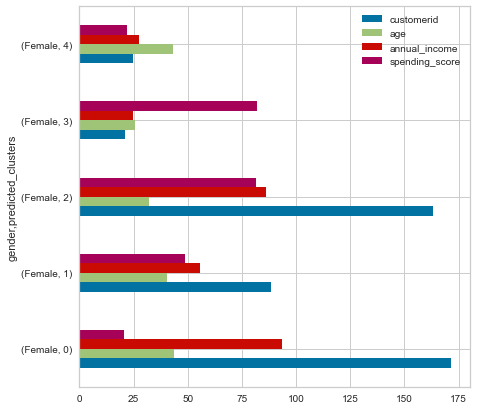

In [81]:
pd.concat([df, df2["predicted_clusters"]], axis=1).groupby(["gender","predicted_clusters"]).mean()[:5].plot(kind="barh", figsize=(7,7))

### Female

cluster 1 : The average age is around 40, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.

cluster 0: The average age is around 45, the annula_income is very high but the spending_scores is low. This group is our target audience and special strategies need to be developed for this group.

cluster 4 :The average age is around 45. Both annula_income and spending_scores are low. It can be directed to shopping with gift certificates.

cluster 3: The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

cluster 2: The average age is around 30, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.